In [1]:
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [2]:
bt='https://www.amazon.in'
ul = 'https://www.amazon.in/Think-Like-Monk-Jay-Shetty/product-reviews/0008386595/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [4]:
page = requests.get(ul)
page

<Response [200]>

In [5]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [6]:
len(cust_name)

1326

In [7]:
len(review_title)

670

In [8]:
len(review_content)

1326

In [9]:
len(rate)

1326

In [10]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

In [11]:
review_title[:] = [titles.rstrip('\n') for titles in review_title]

In [12]:
review_content[:] = [titles.lstrip('\n') for titles in review_content]

In [13]:
review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame()

In [51]:
df.shape

(1326, 3)

In [52]:
df.describe()

,Customer Name,Rating,Reviews
count,1326,1326,1326
unique,1211,5,1315
top,Amazon Customer,5.0 out of 5 stars,Hands down best book I’ve ever read. This bo...
freq,91,1246,3


In [53]:
df

,Customer Name,Rating,Reviews
0,hello world,5.0 out of 5 stars,Actual rating: 4. But I'm giving this book 5...
1,Sarbjeet Khosa,5.0 out of 5 stars,"I don't know how to say You Thanks,😍😍😍I am s..."
2,Ankit Gautam,5.0 out of 5 stars,Today's I just received this amazing book. I...
3,Sankalpita Singh,5.0 out of 5 stars,What to expect?Expect a book that is a detai...
4,Manish Agrawal,1.0 out of 5 stars,"In my opinion merely, this book which has co..."
...,...,...,...
1321,Amazon Customer,5.0 out of 5 stars,Great book
1322,Kelly,5.0 out of 5 stars,Life changing insights!
1323,Lisa,5.0 out of 5 stars,Excellent
1324,Henny,5.0 out of 5 stars,love it


In [46]:
df['Customer Name'] = cust_name

In [54]:
#df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [35]:
df.head(5)

,Customer Name,Rating,Reviews
0,hello world,5.0 out of 5 stars,Actual rating: 4. But I'm giving this book 5...
1,Sarbjeet Khosa,5.0 out of 5 stars,"I don't know how to say You Thanks,😍😍😍I am s..."
2,Ankit Gautam,5.0 out of 5 stars,Today's I just received this amazing book. I...
3,Sankalpita Singh,5.0 out of 5 stars,What to expect?Expect a book that is a detai...
4,Manish Agrawal,1.0 out of 5 stars,"In my opinion merely, this book which has co..."


In [36]:
df.to_csv(r'E:fill.csv',index = True)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [39]:
data = pd.read_csv('/content/E:fill.csv')

In [56]:
data.head()

,Unnamed: 0,Customer Name,Rating,Reviews
0,0,hello world,5.0 out of 5 stars,Actual rating: 4. But I'm giving this book 5...
1,1,Sarbjeet Khosa,5.0 out of 5 stars,"I don't know how to say You Thanks,😍😍😍I am s..."
2,2,Ankit Gautam,5.0 out of 5 stars,Today's I just received this amazing book. I...
3,3,Sankalpita Singh,5.0 out of 5 stars,What to expect?Expect a book that is a detai...
4,4,Manish Agrawal,1.0 out of 5 stars,"In my opinion merely, this book which has co..."


In [57]:
data = data.drop(data.columns[[0]], axis=1)

In [58]:
data.head()

,Customer Name,Rating,Reviews
0,hello world,5.0 out of 5 stars,Actual rating: 4. But I'm giving this book 5...
1,Sarbjeet Khosa,5.0 out of 5 stars,"I don't know how to say You Thanks,😍😍😍I am s..."
2,Ankit Gautam,5.0 out of 5 stars,Today's I just received this amazing book. I...
3,Sankalpita Singh,5.0 out of 5 stars,What to expect?Expect a book that is a detai...
4,Manish Agrawal,1.0 out of 5 stars,"In my opinion merely, this book which has co..."


In [59]:
data.dtypes

Customer Name    object
Rating           object
Reviews          object
dtype: object

In [60]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [61]:
data['Rating']

0       5.0
1       5.0
2       5.0
3       5.0
4       1.0
       ... 
1321    5.0
1322    5.0
1323    5.0
1324    5.0
1325    5.0
Name: Rating, Length: 1326, dtype: object

In [62]:
data['Rating'].value_counts(normalize=True)*100

5.0    93.966817
4.0     2.790347
1.0     1.357466
3.0     1.131222
2.0     0.754148
Name: Rating, dtype: float64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  1325 non-null   object
 1   Rating         1326 non-null   object
 2   Reviews        1326 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [64]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Reviews
Rating,,
1.0,18,18
2.0,10,10
3.0,15,15
4.0,37,37
5.0,1245,1246


Text(0, 0.5, 'Count')

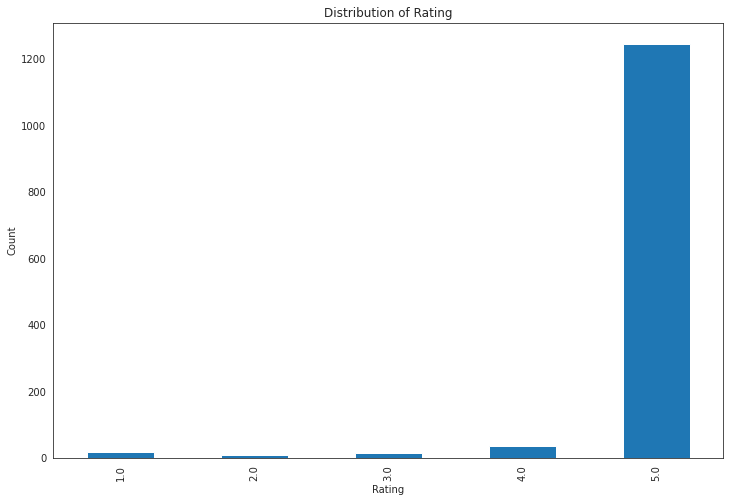

In [65]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

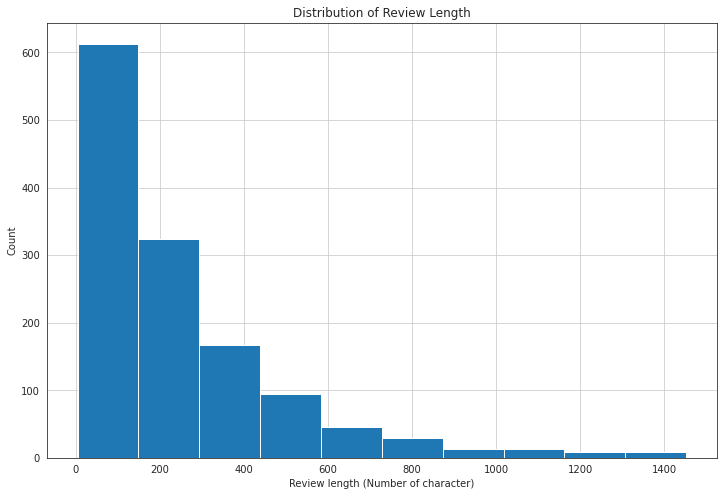

In [66]:
review_length = data["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

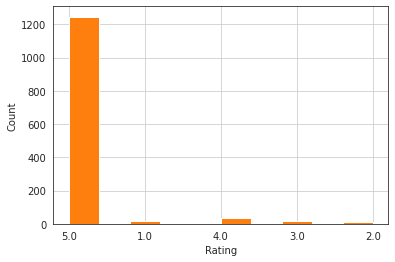

In [67]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [69]:
Reviews=data.iloc[:,[2
                     ]]

In [70]:
Reviews.shape

(1326, 1)

In [71]:
Reviews.describe()

,Reviews
count,1326
unique,1315
top,Hands down best book I’ve ever read. This bo...
freq,3


In [72]:
Reviews.head()

,Reviews
0,Actual rating: 4. But I'm giving this book 5...
1,"I don't know how to say You Thanks,😍😍😍I am s..."
2,Today's I just received this amazing book. I...
3,What to expect?Expect a book that is a detai...
4,"In my opinion merely, this book which has co..."


In [74]:
# removing customer name column as they have not that significance in output##
data.drop(["Customer Name"],axis=1,inplace=True)

In [76]:
data.head()

,Rating,Reviews
0,5.0,"actual rating: 4. but i'm giving this book 5, ..."
1,5.0,"i don't know how to say you thanks,😍😍😍i am so ..."
2,5.0,today's i just received this amazing book. i h...
3,5.0,what to expect?expect a book that is a detaile...
4,1.0,"in my opinion merely, this book which has comp..."


In [78]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))


In [79]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))
            

In [80]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')


In [81]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords


In [85]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [86]:
stop_words=stopwords.words('english')

In [87]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [88]:
data.head(5)

,Rating,Reviews
0,5.0,actual rating im giving book jays first book h...
1,5.0,dont know say thanks😍😍😍i grateful god sending ...
2,5.0,todays received amazing book read first pages ...
3,5.0,expectexpect book detailed read one bound take...
4,1.0,opinion merely book comprised many things noth...


In [91]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [92]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [93]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [94]:
data['Reviews'].head()

0    actual rating im giving book jay first book ha...
1    dont know say thanks😍😍😍i grateful god sending ...
2    today received amazing book read first page th...
3    expectexpect book detailed read one bound take...
4    opinion merely book comprised many thing nothi...
Name: Reviews, dtype: object

In [95]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aachikaaame  aahaa  ab  abide  ...  zählen  également  überwinden  übungen
0               0      0   0      0  ...       0          0           0        0
1               0      0   0      0  ...       0          0           0        0
2               0      0   0      0  ...       0          0           0        0
3               0      0   0      0  ...       0          0           0        0
4               0      0   0      0  ...       0          0           0        0
...           ...    ...  ..    ...  ...     ...        ...         ...      ...
1321            0      0   0      0  ...       0          0           0        0
1322            0      0   0      0  ...       0          0           0        0
1323            0      0   0      0  ...       0          0           0        0
1324            0      0   0      0  ...       0          0           0        0
1325            0      0   0      0  ...       0          0           0        0

[1326 rows x 4467 columns]


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)


  (0, 495)	0.03807355404129098
  (0, 3657)	0.031033747419049157
  (0, 660)	0.03807355404129098
  (0, 3255)	0.036014542598121015
  (0, 3937)	0.03807355404129098
  (0, 1180)	0.03807355404129098
  (0, 292)	0.02897473597587919
  (0, 2998)	0.03807355404129098
  (0, 2036)	0.03342049496303319
  (0, 95)	0.03807355404129098
  (0, 3714)	0.036014542598121015
  (0, 3013)	0.03455365073017007
  (0, 3006)	0.036014542598121015
  (0, 1529)	0.03455365073017007
  (0, 644)	0.017324365477768985
  (0, 3433)	0.022376785921132274
  (0, 3277)	0.036014542598121015
  (0, 139)	0.020317774477962305
  (0, 344)	0.029416592543374098
  (0, 1081)	0.03455365073017007
  (0, 94)	0.036014542598121015
  (0, 2519)	0.01527959849569598
  (0, 3181)	0.022613021401357954
  (0, 163)	0.030435627843830134
  (0, 4454)	0.07202908519624203
  :	:
  (1314, 461)	0.16655072084470127
  (1315, 1745)	0.639855915888321
  (1315, 1979)	0.5334242032392741
  (1315, 4082)	0.45569334975192793
  (1315, 143)	0.313666378965184
  (1316, 2742)	0.69571262

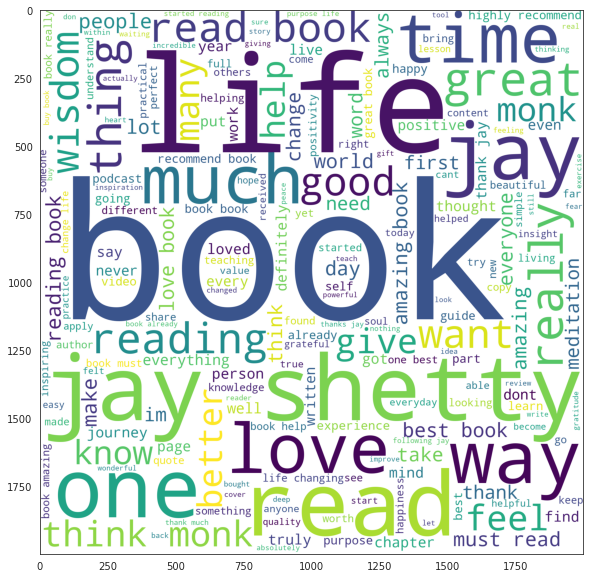

In [97]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [98]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[0:20]
freq


book       2173
jay         688
life        687
read        564
like        350
reading     300
love        277
one         262
shetty      248
amazing     236
way         221
monk        221
much        209
time        204
think       200
really      195
great       194
help        187
best        185
wisdom      176
dtype: int64

In [99]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')
  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [100]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,actual rating im giving book jay first book ha...,0.059917
1,dont know say thanks😍😍😍i grateful god sending ...,0.373006
2,today received amazing book read first page th...,0.408333
3,expectexpect book detailed read one bound take...,0.252528
4,opinion merely book comprised many thing nothi...,0.317857


In [101]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,polarity
0,5.0,actual rating im giving book jay first book ha...,0.059917
1,5.0,dont know say thanks😍😍😍i grateful god sending ...,0.373006
2,5.0,today received amazing book read first page th...,0.408333
3,5.0,expectexpect book detailed read one bound take...,0.252528
4,1.0,opinion merely book comprised many thing nothi...,0.317857


In [102]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative') 


In [103]:
sent_type(data['polarity'])


positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
po

In [104]:
data["category"]=data['polarity']

In [105]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"


In [106]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating        object
Reviews       object
polarity     float64
category    category
dtype: object

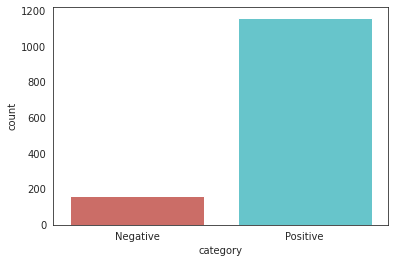

In [107]:
sns.countplot(x='category',data=data,palette='hls')

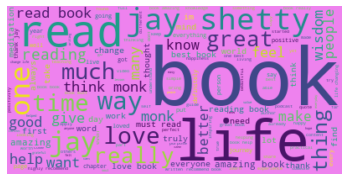

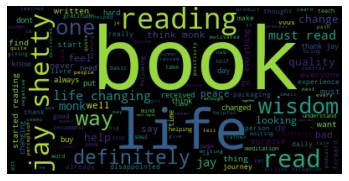

In [110]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='violet',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()